## Univariate data analyses - NHANES case study

Here we will demonstrate how to use Python and [Pandas](https://pandas.pydata.org/) to perform some basic analyses with univariate data, using the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study to illustrate the techniques.

The following import statements make the libraries that we will need available.  Note that in a Jupyter notebook, you should generally use the `%matplotlib inline` directive, which would not be used when running a script outside of the Jupyter environment.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Next we will load the NHANES data from a file.

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

### Frequency tables

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable.  Below we show the frequency distribution of the [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) variable, which is a variable that reflects a person's level of educational attainment.  The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts` is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable.  The meaning of these codes is given in the NHANES codebook located [here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2), and will be discussed further below.  This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [6]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

Note that the `value_counts` method excludes missing values.  We confirm this below by adding up the number of observations with a DMDEDUC2 value equal to 1, 2, 3, 4, 5, or 9 (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735. This tells us that there are 5735 - 5474 = 261 missing values for this variable (other variables may have different numbers of missing values).

In [10]:
print(da.DMDEDUC2.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3) # Manually sum the frequencies
print(da.shape)

5474
5474
(5735, 28)


Another way to obtain this result is to locate all the null (missing) values in the data set using the [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) Pandas function, and count the number of such locations.

In [12]:
pd.isnull(da.DMDEDUC2).sum()

261

In [13]:
# New cell added by Kristin 
# Another way to find how many missing values
da.DMDEDUC2.isnull().sum()

261

In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

#### <font color='red'>!!!Kristin's note: pandas.Series.replace function</font>
Pandas.Series.replace(): if passing a dictionary (as argument to_replace), replace keys with values in the dictionary. For simple value replacement, you may use `.replace()`. You may want to use `.apply()` if complex logics are involved.

In [14]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [15]:
# New cell added by Kristin
# Two ways to access DMDEDUC2x: one is da.DMDEDUC2x, the other is da["DMDEDUC2x"]
da["DMDEDUC2x"]

0               College
1                HS/GED
2                HS/GED
3               College
4       Some college/AA
             ...       
5730             HS/GED
5731            College
5732    Some college/AA
5733                 <9
5734            College
Name: DMDEDUC2x, Length: 5735, dtype: object

We will also want to have a relabeled version of the gender variable, so we will construct that now as well.  We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [16]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.  We can do this as follows:

In [17]:
# Kristin: x is a series, x.sum() is a number. 
# x/x.sum() means every value in the series will be divided by the sum of all values.
x = da.DMDEDUC2x.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [18]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

### Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the [describe](https://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe) data frame method.  Below we demonstrate how to do this using the body weight variable ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)).  As with many surveys, some data values are missing, so we explicitly drop the missing cases using the [dropna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#dropping-axis-labels-with-missing-data-dropna) method before generating the summaries.

In [19]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

It's also possible to calculate individual summary statistics from one column of a data set.  This can be done using Pandas methods, or with numpy functions:

In [20]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


Next we look at frequencies for a systolic blood pressure measurement ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).  "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89.  Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension. 

In [21]:
# New cell added by Kristin 
# ((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)) gives a series of True or False value
# Basically, it's a series consists of 1 or 0
print((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)) # Kristin - print this first

0        True
1       False
2        True
3        True
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Length: 5735, dtype: bool


In [22]:
# Kristin: np.mean(a series of boolean values) sum up all the ones and divided by # of rows,
# gives proprotion of the NHANES sample who are pre-hypertension.
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))  # "&" means "and"

0.3741935483870968

Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [23]:
# Kristin: again (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89) gives a series of boolean
# np.mean(series of boolean) gives the propotion for those who are pre-hypertensive
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [24]:
# Kristin: (a|b) is a series of boolean
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))  # "|" means "or"

0.43975588491717527


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [25]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

0.6749860309182343
0.3490407897187558


### Graphical summaries

Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram.  It is evidently right-skewed.

C:\Users\huiyi\anaconda3\envs\coursera_visual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXWT', ylabel='Density'>

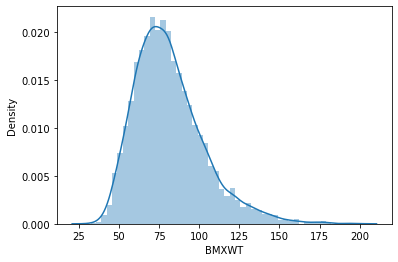

In [26]:
# Kristin: histogram is commonly use to the distribution of a quantitative variables.
# Note: By default, kde is set to True. So we will have kde curve and y label is also
# based on density.
sns.distplot(da.BMXWT.dropna())

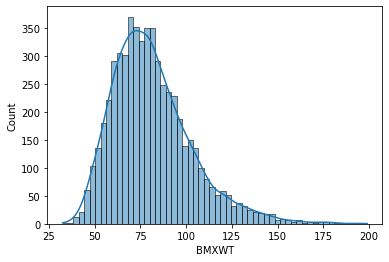

In [27]:
# New cell added by Kristin
# use histplot to get rid of warning
sns.histplot(da.BMXWT.dropna(), kde=True);

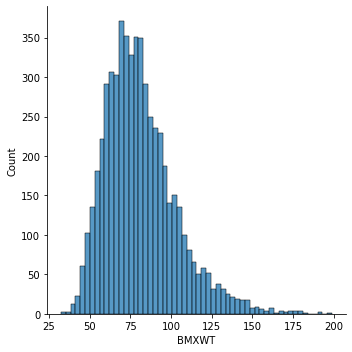

In [28]:
# New cell added by Kristin: 
# use displot to get rid of warning
sns.displot(da.BMXWT.dropna())

Next we look at the histogram of systolic blood pressure measurements.  You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units.

C:\Users\huiyi\anaconda3\envs\coursera_visual\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPXSY1', ylabel='Density'>

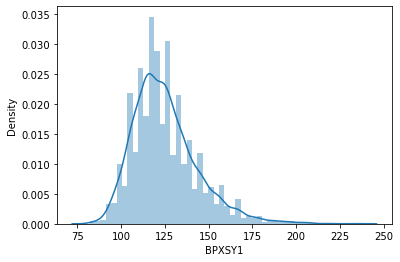

In [29]:
sns.distplot(da.BPXSY1.dropna())

<AxesSubplot:xlabel='BPXSY1', ylabel='Count'>

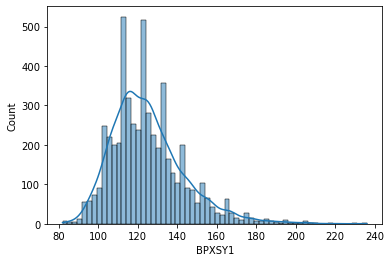

In [30]:
# New Cell added by Kristin
# Again, use histplot or displot to get rid of warning 
sns.histplot(da.BPXSY1.dropna(), kde=True)

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1), BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

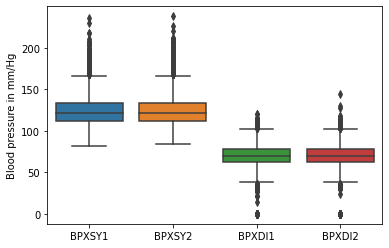

In [31]:
# Kristin: Note - we set the 'data' to the subset of the original dataframe
# We use .loc[:] notation to take every row, but just the 4 columns: BPXSY1, BPXSY2, BPXDI1, BPXDI2
# The comparsion makes sense if all the columns measure the same thing: blood pressure.
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

In [32]:
# New cell added by Kristin
# take a look at the columns
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDEDUC2x', 'RIAGENDRx'],
      dtype='object')

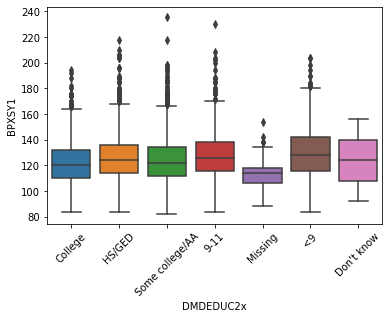

In [33]:
# New cell adde by Kristin
# There is another way to use boxplot. We use one categorical variable as 'x', and
# one numerical variable as 'y'. Along x-axis, we get all different of values of a categorical
# variable.
sns.boxplot(data=da, x="DMDEDUC2x", y="BPXSY1")
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

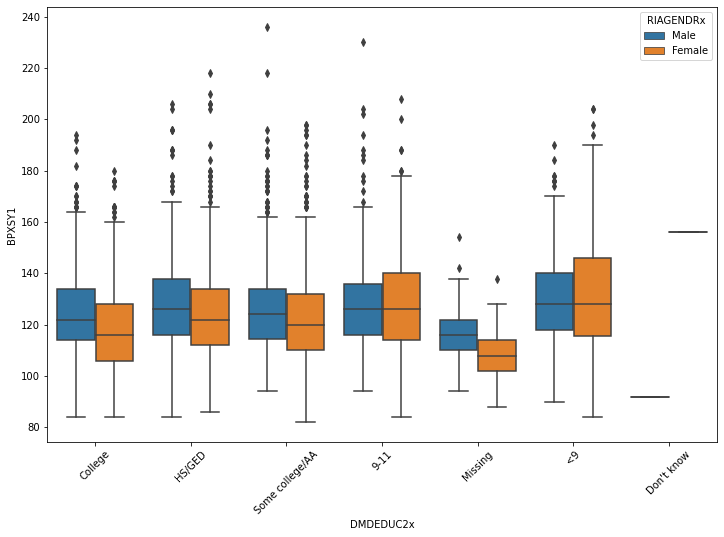

In [34]:
# New cell added by Kristin
# Besides, x, y, we may also specify 'hue', it will be a categorical variable.
plt.figure(figsize=(12,8)) # You may specif a large figure size
sns.boxplot(data=da, x="DMDEDUC2x", y="BPXSY1", hue="RIAGENDRx")
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

### Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.  To see this trend in the NHANES data, we can [partition](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum.  Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data.  Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

#### <font color='red'>!!! Kristin's note: pandas cut() function</font>
Use **`cut`** when you need to `segment and sort` data values into bins. This function is also useful for going from a **`continuous`** variable to a **`categorical`** variable. For example, `cut` could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [35]:
# New cell added by Kristin 
# To understand what pd.cut does on a continous variable, print the following
da['agegrp'] = pd.cut(da.RIDAGEYR, [18,30,40,50,60,70,80])
print(da.agegrp.head(5))
print('\n')
da.agegrp.dtype

0    (60, 70]
1    (50, 60]
2    (70, 80]
3    (50, 60]
4    (40, 50]
Name: agegrp, dtype: category
Categories (6, interval[int64, right]): [(18, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]




CategoricalDtype(categories=[(18, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80]], ordered=True)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

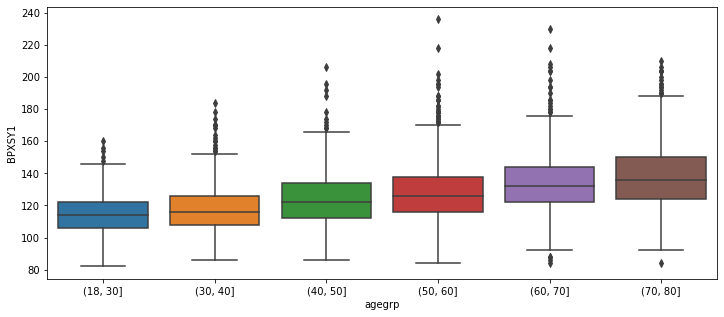

In [36]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)

# Kristin: this is another way to draw a boxplot: specify data, x (a categorial variable),
# y (a numerical variable)
sns.boxplot(x="agegrp", y="BPXSY1", data=da)  # Make boxplot of BPXSY1 stratified by age group

Taking this a step further, it is also the case that blood pressure tends to differ between women and men.  While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure.  Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

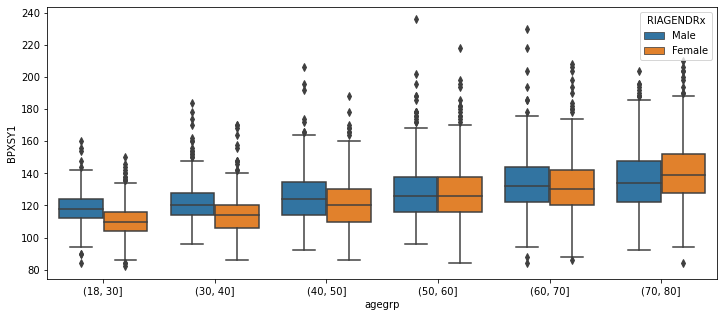

In [37]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))

# Kristin: you may specifiy 'hue' too - a categorical variable
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands.  Each approach highlights a different aspect of the data.

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BPXSY1'>

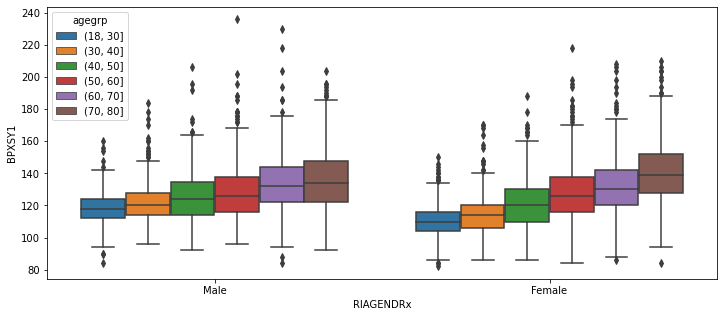

In [38]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

Stratification can also be useful when working with categorical variables.  Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands.  While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates. 

**Note on causality and confounding:** An important role of statistics is to aid researchers in identifying causes underlying observed differences.  Here we have seen differences in both blood pressure and educational attainment based on age.  It is plausible that aging directly causes blood pressure to increase.  But in the case of educational attainment, this is actually a "birth cohort effect".  NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later.  Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past.  Therefore, younger people as a group have higher educational attainment than older people as a group.  As these young people grow older, the cross sectional relationship between age and educational attainment will change.

#### <font color='red'>!!!Kristin's note: pandas groupby function</font>
The process of Pandas's groupby function normally includes the following steps: **`split-apply-combine`**. During this process, the data in the dataframe is split (categorized) according to the values in certain column(s) (which is/are categorical variable(s)).Then some operations are applied on other column(s) to get some aggregate results. 

[Check out groupby article here](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5)

#### Groupby Examples (Optional)

In [39]:
# New cell added by Kristin
# Create a simple dataframe
my_data = [[1, "20-30", "F", "level_1", 70],[2, "30-40", "F", "level_2", 80],[3, "30-40", "M", "level_3", 95],[4, "20-30", "M", "level_3", 93]]
my_df = pd.DataFrame(data=my_data, columns=["ID", "Agegrp", "Gender", "EduLevel", 'Score'])
my_df

,ID,Agegrp,Gender,EduLevel,Score
0,1,20-30,F,level_1,70
1,2,30-40,F,level_2,80
2,3,30-40,M,level_3,95
3,4,20-30,M,level_3,93


**Example 1**

In [40]:
# New cell added by Kristin
# Each row of my_df goes to the age group they should belong to according to their "Agegrp" value.
# Then we get the total count for each educational level within each age group.
new_obj = my_df.groupby("Agegrp")["EduLevel"].value_counts()
print(new_obj)

Agegrp  EduLevel
20-30   level_1     1
        level_3     1
30-40   level_2     1
        level_3     1
Name: EduLevel, dtype: int64


**Example 2 & Example 3**

In [41]:
# New cell added by Kristin
x = my_df.groupby("Agegrp")["Score"].mean() # Get the average score for different age group
y = my_df.groupby("Gender")["Score"].sum() # Get the total socre for different gender
print(x)
print()
print(y)

Agegrp
20-30    81.5
30-40    87.5
Name: Score, dtype: float64

Gender
F    150
M    188
Name: Score, dtype: int64


#### End of Optional Material

In [42]:
# Kristin: look at the layout of the following output and compare to the output of
# da["DMDEDUC2x"].value_counts() - we got about 5 times more of data.
# Basically, each row of da goes to different age group according to their "agegrp" value.
# Then we get the total count for each educational level within each age group.
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously.  In doing this, it is easier to interpret the results if we [pivot](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) the education levels into the columns, and normalize the counts so that they sum to 1.  After doing this, the results can be interpreted as proportions or probabilities.  One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [43]:
# Kristin: it's not easy to understand the effect of each line in this last cell
# Break them down for easy understanding

# Kristin: Create a new dataframe from the original dataframe:
# 1) Keep all the columns 2) Remove the rows with the value "Don't know"/"Missing" in DMDEDUC2x
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values

# Kristin: Split the dataframe by "agegrp" and "RIAGENDRx", then retrive "DMDEDUC2x" column.
# Note: dx.groupby(["agegrp", "RIAGENDRx"]) split the data in dx into 12 grps:
# 6 (# of age group) x 2 (# of gender). 
# The object returned by dx.groupby(["agegrp", "RIAGENDRx"]) is a DataFrameGroupBy
# The object returned by dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"] is a SeriesGroupBy
# You may view it as a series (column) with 2 row indexes - "agegrp" and "RIAGENDRx" 
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]

# Kristin: normally, we want to apply certain function on the resulting SeriesGroupBy object
# Since this SeriesGroupBy stores values for a categorical variable ("DMDEDUC2x"),
# we may apply value_counts function. If it stores a numerial varilbe, we may apply .mean, .sum etc.
dx = dx.value_counts()

# Kristin: refer to the value_counts output in the cell above this one.
# If we want to calculate the proportion of each educational level within each (age,gender) group
# We need to unpack the data.
dx = dx.unstack() # Restructure the results from 'long' to 'wide'

# Use pandas's apply function on each cell in a row or column.
# We want to apply the function accross the columns (axis = 1). X.sum() sums up all the numbers in a row.
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255
